<a href="https://colab.research.google.com/github/isha027/Statistic-Analysis/blob/main/StatisticalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The population data is, in the csv format, with a single column – “Movie Length” (the movie lengths are in minutes); this is in the repository.

(1) Found the mean and variance of the population data and also, plotted its density plot.

(2) n = 100 random samples of size 50 from the population dataset were generated.

Sampling scheme: Simple random sampling with replacement

(3) Sample mean of each sample was calculated. 100 sample means
were obtained.

(4) Histogram of these 100 sample means were plotted.

(5) Mean and standard deviation of 100 sample means were
calculated.

(6) CLT can be applied, hence hypothesis testing was performed using z-test, as n >= 30.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files

In [ ]:
uploaded = files.upload()
try:
    Big_data = pd.read_csv(io.BytesIO(uploaded['teststat(2).csv'])) # population data
except KeyError:
    pass

Saving teststat(2).csv to teststat(2) (1).csv


In [ ]:
Big_data.head(210)

,Movie Length
0,169
1,154
2,169
3,152
4,176
...,...
205,92
206,140
207,149
208,104


In [ ]:
# Calculating mean (mu) and variance ((sigma)^2) from population data (Big_data):
population = np.array(Big_data['Movie Length'])
mu = population.mean(); # (μ)
var = population.var();
print("Population Mean:" , mu) # mu
print("Population Size :" , len(population))
print("Population Variance : ", var) #(sigma)^2
print("Population Standard deviation :", population.std())

Population Mean: 149.5047619047619
Population Size : 210
Population Variance :  1128.3166439909298
Population Standard deviation : 33.590424885537395


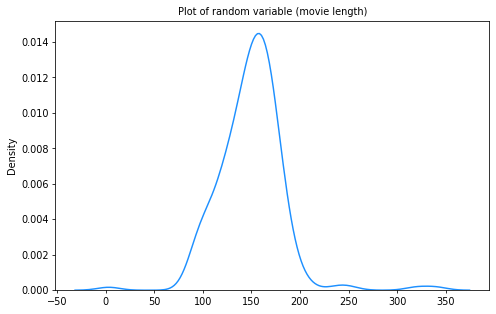

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5), dpi= 70)
sns.kdeplot(population, color="dodgerblue")
plt.title('Plot of random variable (movie length)', fontsize=10)
plt.show();
#Density plot is used to show probability density function of a random variable

In [ ]:
# Drawing 100000 random samples of size = Sample_size from the population, with sampling scheme = simple random sampling with replacement:
Sample_size = 50
n = 100
data = np.empty([n, Sample_size])
for i in range(n):
  data[i] = np.array((Big_data.sample((50), replace = True))['Movie Length'])  #random sampling from population , with replacement
print(data)

[[ 96.  98. 121. ... 161. 124. 115.]
 [177. 118. 158. ... 208. 158. 176.]
 [157. 162. 238. ... 167. 158. 131.]
 ...
 [168. 122. 100. ... 162. 138. 106.]
 [153.   3. 171. ... 165. 118. 165.]
 [131. 130. 158. ... 153. 169. 171.]]


In [ ]:
# Calculating and storing sample means of these 100000 random samples:
Sample_means_collection = np.zeros(n)
for i in range(n):
  Sample_means_collection[i] = data[i].mean()

In [ ]:
# Calculating the mean and standard deviation of these 100000 sample means:
s_mean = Sample_means_collection.mean();
s_std = Sample_means_collection.std();
print("Mean of Sample means: ", s_mean)
print("Standard deviation of Sample means:", s_std)

Mean of Sample means:  149.4758
Standard deviation of Sample means: 4.68192293400906


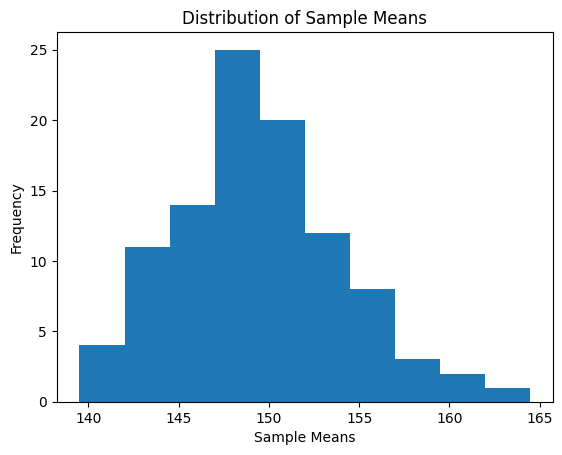

In [ ]:
# Plotting the 100000 sample means:
plt.hist(Sample_means_collection)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means")
plt.show()

The means of the samples are approximately in normal distribution and assume that they are approximately independently and identically distributed.
Hence, Central Limit Theorem can be applied here. As n is greater than 30, we conduct a z-test for hypthesis testing. Three approaches of hypothesis testing have been applied:

Method 1: based on p-value

Method 2: based on confidence interval

Method 3: beased on observed z-score and critical z value

Xi: mean of ith sample, for i = 1, 2, ... 100

m : The mean of the means of the samples

s : The standard deviation of the sample of sample means

n : 100

H0 (Null hypothesis): μ' = μ versus Ha (Alternative hypothesis) : μ' ≠ μ.

Since n = 100000, it is reasonable to assume that
Z = (m − μ)/(s/√n) ∼ N(0, 1), by CLT

Under H0, we calculate Z − test value using the information; m = s_mean , s = s_std and n = 100

Level of significance: α = 5%

This is two tailed test

In [ ]:
import scipy.stats as stats

In [ ]:
null_hypothesis = "The sample mean is equal to the population mean."
alternative_hypothesis = "The sample mean is significantly different from the population mean."

In [ ]:
# Method 1: (p-value test)
alpha = 0.05

# Calculate z-score
zobs = (s_mean - mu) / (s_std / np.sqrt(len(Sample_means_collection)))

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(zobs)))

print("observed z-score:", zobs)
print("p-value:", p_value)

if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

observed z-score: -0.06185899505419714
p-value: 0.9506751221344678
Fail to reject null hypothesis


In [ ]:
# Method 2: (By checking whether the population mean lies in the confidence interval)

zcrit = stats.norm.ppf(1 - alpha / 2) # critical value
margin_of_error = zcrit * (s_std / np.sqrt(n))

# Calculate the confidence interval bounds
lower_bound = s_mean - margin_of_error
upper_bound = s_mean + margin_of_error

# Print the confidence interval
print("Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

Confidence Interval: [147.7978265624172, 149.63697343758278]


In [ ]:
if lower_bound <= mu <= upper_bound:
  print("Fail to reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Fail to reject the null hypothesis


In [ ]:
# Method 3: (By comparing the observed z score and the critical z value)
if zobs < zcrit:
    print("Fail to reject the null hypothesis")
else:
    print("Reject null hypothesis")

Fail to reject the null hypothesis


In the light of the data and the above analyses, it seems that the means of each sample are not significantly different from the population mean (μ) based on a significance level of 5%.